/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   cluster  count  percentage
0        4  23759   33.924951
1        0  19754   28.206300
2        2  15629   22.316304
3        7   7249   10.350687
4        5   3450    4.926179
5        3     96    0.137076
6        8     63    0.089956
7        6     29    0.041408
8        1      5    0.007139
Cluster centers:
[[ 6.53302812e-01 -2.64916747e-02 -8.71184466e-03 -1.27640622e-02
  -9.61040567e-03]
 [ 8.02474069e-01 -1.47736458e-02  1.18331332e+02  1.16871138e+02
   1.18239508e+02]
 [-8.80095980e-01 -5.42093524e-02 -8.58608509e-03 -1.35863486e-02
  -7.88323430e-03]
 [-7.81608992e-01  2.68289395e+01 -1.24965205e-02 -4.69739681e-02
  -1.06095865e-02]
 [-9.54905447e-02 -3.81221819e-02 -8.37133602e-03 -1.27935437e-02
  -9.83575991e-03]
 [-2.29890383e+00 -7.49946784e-02 -8.07648846e-03 -1.18450859e-02
   9.13295851e-03]
 [-1.43380413e+01  4.58685509e-01  2.79864012e-01  2.50903521e-01
  -9.85227559e-03]
 [ 1.52615585e+00 -1.61109495e-02 -8.97482390e-03 -1.42769735e-02
  -1.01771232e-02]
 [ 

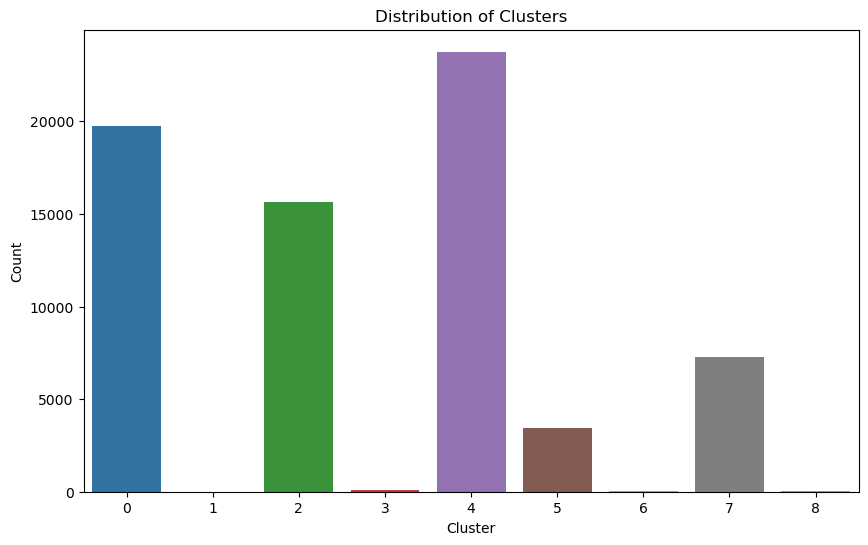

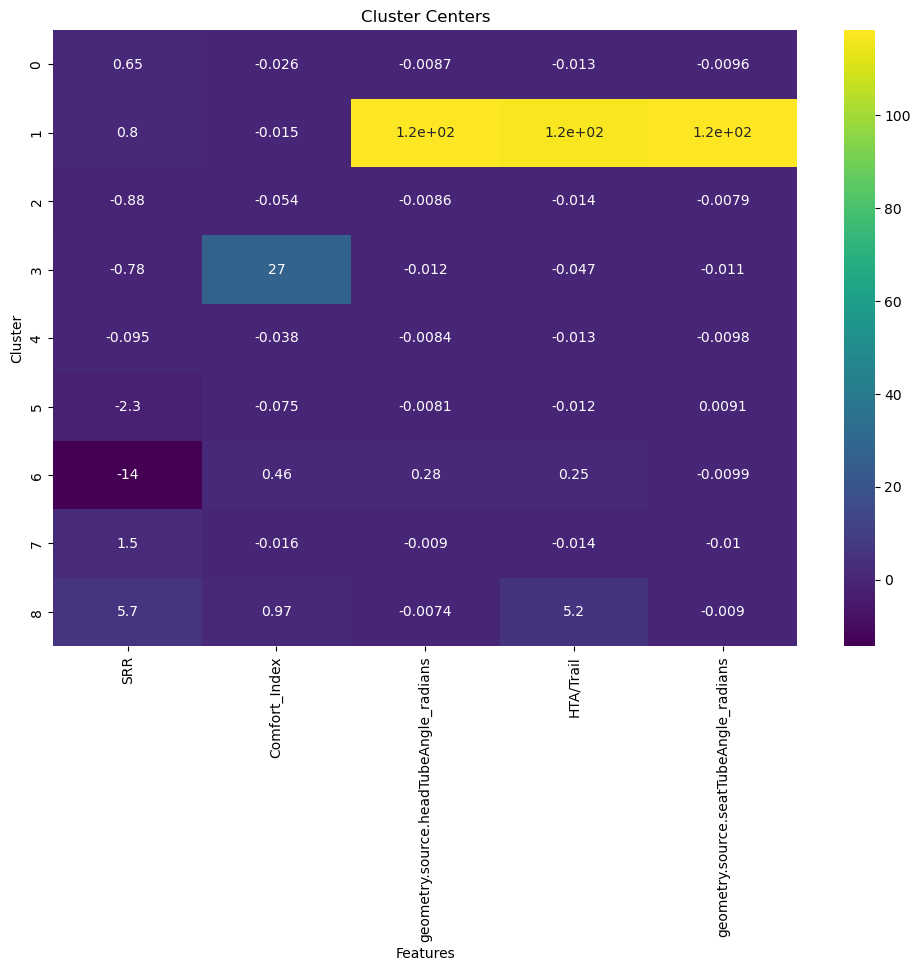

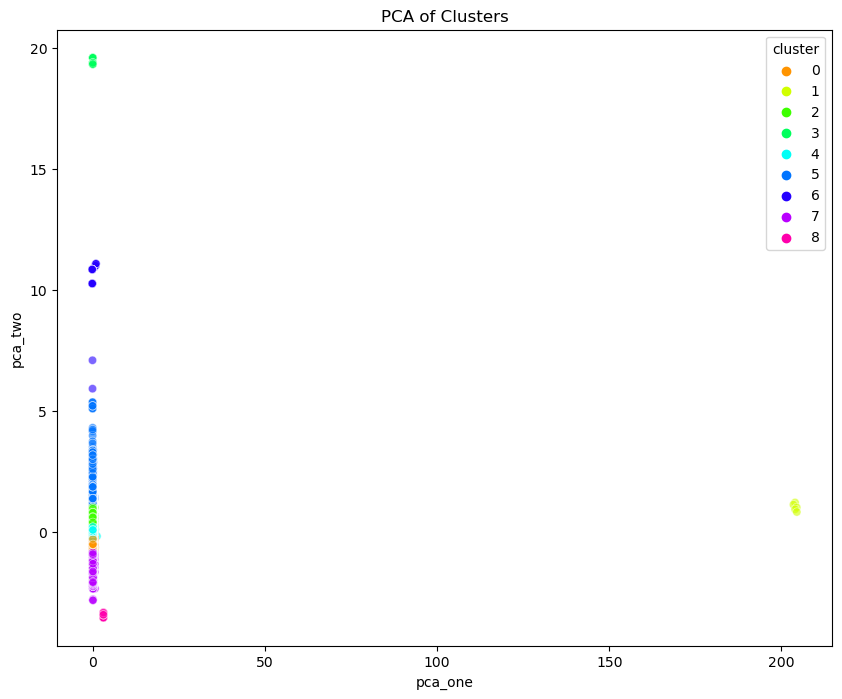

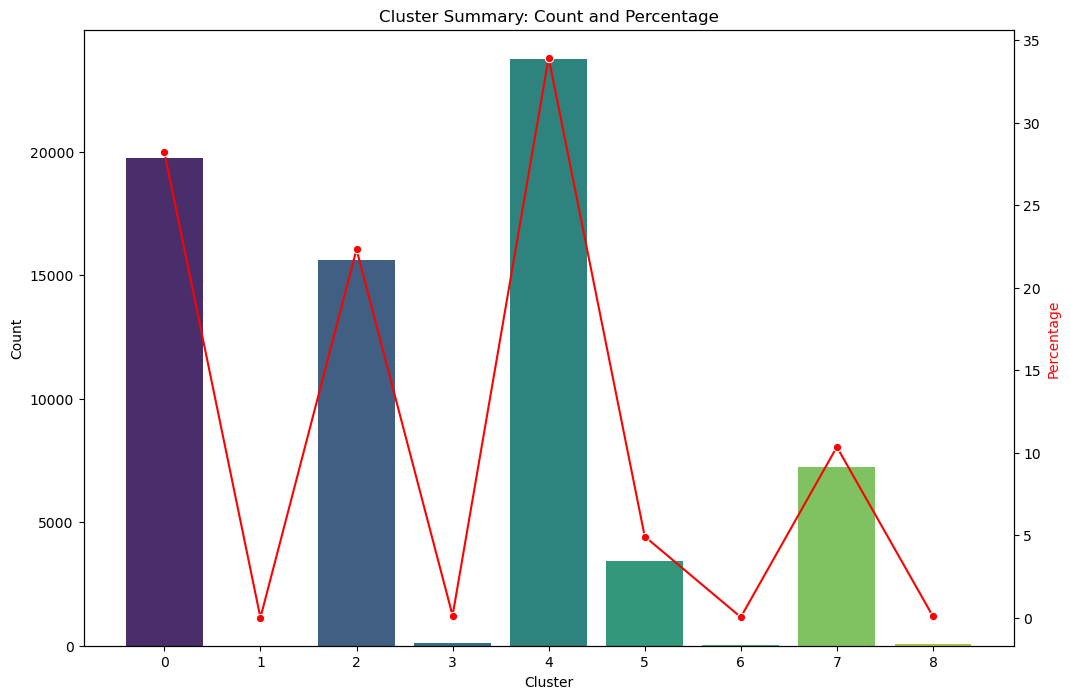

Clustered data saved to: clustered_data.csv
Cluster summary saved to: cluster_summary.csv


In [1]:
# Final Clustering Algorithm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('encoded_road_bikes_2020-2024.csv')

# Select only the specified columns
columns_to_include = [
    'SRR', 
    'Comfort_Index',
    'geometry.source.headTubeAngle_radians',
    'HTA/Trail',
    'geometry.source.seatTubeAngle_radians',
]

df = df[columns_to_include]

# Running k-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df)

# Adding the cluster labels to your dataframe
df['cluster'] = kmeans.labels_

# Count the number of bikes in each cluster
cluster_counts = df['cluster'].value_counts()

# Calculate the percentage of bikes in each cluster
total_bikes = len(df)
cluster_percentages = (cluster_counts / total_bikes) * 100

# Add the percentage column to the DataFrame
cluster_summary = cluster_counts.reset_index()
cluster_summary.columns = ['cluster', 'count']
cluster_summary['percentage'] = (cluster_summary['count'] / total_bikes) * 100

# Print the counts and percentages for each cluster
print(cluster_summary)

# Save the dataframe with cluster labels
df.to_csv('clustered_data.csv', index=False)

# Save the cluster summary to a new CSV file
cluster_summary.to_csv('cluster_summary.csv', index=False)

# Optional: Print out the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Visualize the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Visualize the cluster centers
plt.figure(figsize=(12, 8))
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=columns_to_include)
sns.heatmap(centers_df, annot=True, cmap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[columns_to_include])
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca_one', y='pca_two',
    hue='cluster',
    palette=sns.color_palette("hsv", 9),
    data=df,
    legend="full",
    alpha=0.6
)
plt.title('PCA of Clusters')
plt.show()

# Visualize the cluster summary (count and percentage)
fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
sns.barplot(x='cluster', y='count', data=cluster_summary, ax=ax1, palette='viridis')
sns.lineplot(x='cluster', y='percentage', data=cluster_summary, ax=ax2, color='red', marker='o')

ax1.set_xlabel('Cluster')
ax1.set_ylabel('Count')
ax2.set_ylabel('Percentage', color='red')

plt.title('Cluster Summary: Count and Percentage')
plt.show()

# Print the name of the file where the new data has been saved
output_filename = 'clustered_data.csv'
print(f"Clustered data saved to: {output_filename}")
summary_output_filename = 'cluster_summary.csv'
print(f"Cluster summary saved to: {summary_output_filename}")


# Determing number of Clusters (K)

### Elbow Method

This helps define the number of clusters (k). 
This is required before the clustering algorithm can be run. 

/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexhayman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

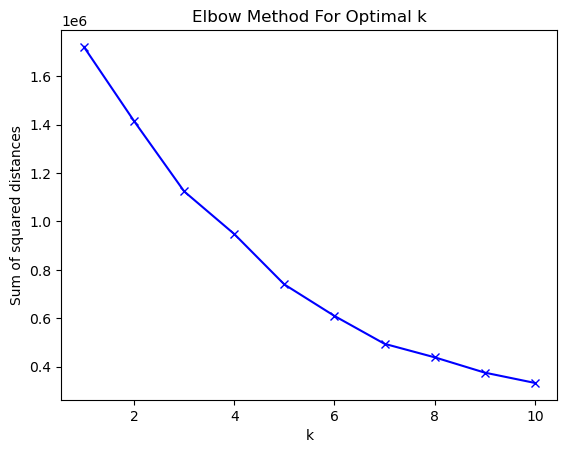

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Reading the CSV file
data = pd.read_csv('encoded_road_bikes_2020-2024.csv')

# Step 2: Optionally, select relevant columns if necessary
# data = data[['feature1', 'feature2', 'feature3']]

# Step 3: Apply the Elbow Method
ssd = []
K = range(1, 11)  # Example range for k
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    ssd.append(km.inertia_)

# Plotting the Elbow
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
### Silhouette Method

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('encoded_road_bikes_2020-2024.csv')

# Step 2: Optional - Select relevant columns if your CSV contains more than the required features
# df = df[['feature1', 'feature2', '...']]

# Step 3: Calculate silhouette scores for different numbers of clusters
silhouette_scores = {}
for k in [3, 4]:
    # Notice the inclusion of n_init=10 to address the warning
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df)
    score = silhouette_score(df, km.labels_)
    silhouette_scores[k] = score

print(silhouette_scores)
